### Poisson Likelihood

We now briefly see how to plug in the Poisson likelihood in our model. We borrow from an [excellent example](https://tinygp.readthedocs.io/en/stable/tutorials/likelihoods.html) in the tinyGP docs.

Text(0.5, 0, 'x')

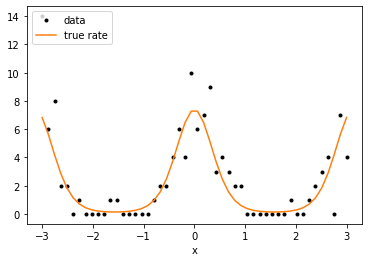

In [6]:
import pyro
import torch
import matplotlib.pyplot as plt
import pyro.contrib.gp as gp
smoke_test = False

pyro.clear_param_store()
X = torch.linspace(-3, 3, 50)
true_log_rate = 2 * torch.cos(2 * X)
y = torch.poisson(torch.exp(true_log_rate))
plt.plot(X, y, ".k", label="data")
plt.plot(X, torch.exp(true_log_rate), "C1", label="true rate")
plt.legend(loc=2)
plt.xlabel("x")

Text(0, 0.5, 'Loss')

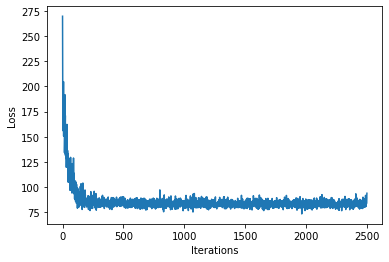

In [7]:
pyro.clear_param_store()
kernel = gp.kernels.Matern52(input_dim=1)
likelihood = gp.likelihoods.Poisson()
vgp = gp.models.VariationalGP(
    X, y, kernel, likelihood=likelihood, whiten=True, jitter=0.0001)


num_steps = 2500 if not smoke_test else 2
losses = gp.util.train(vgp, num_steps=num_steps)
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0.5, 0, 'x')

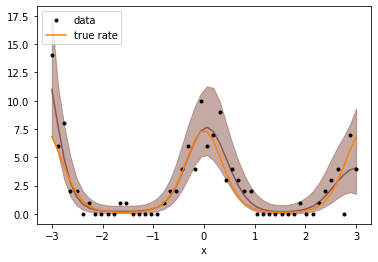

In [11]:
with torch.no_grad():
    mean, var = vgp(X)
plt.plot(X, torch.exp(mean), color='C5')
std = torch.sqrt(var)
plt.fill_between(X, torch.exp(mean - 2*std), torch.exp(mean + 2*std), color='C5', alpha=0.5)
plt.plot(X, y, ".k", label="data")
plt.plot(X, torch.exp(true_log_rate), "C1", label="true rate")
plt.legend(loc=2)
plt.xlabel("x")